In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
#Data reading
df = pd.read_csv("worldcoin-org_2023-07-24_2024-04-09.csv")
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-08,2024-04-09,933.952836,967.209462,913.718538,948.117516,6.416583e+10,1.685649e+11
1,2024-04-07,2024-04-08,901.187578,948.936529,901.187578,931.382503,6.675005e+10,1.653840e+11
2,2024-04-06,2024-04-07,887.354051,935.367097,883.524831,902.722330,7.536231e+10,1.610354e+11
3,2024-04-05,2024-04-06,886.431619,902.019500,843.009636,891.403798,7.218241e+10,1.550940e+11
4,2024-04-04,2024-04-05,874.314414,924.103204,860.637373,890.984968,7.071743e+10,1.555043e+11
...,...,...,...,...,...,...,...,...
255,2023-07-28,2023-07-29,268.376455,288.763505,266.613366,287.867366,6.053932e+10,2.942581e+10
256,2023-07-27,2023-07-28,289.915922,298.136629,270.784285,272.091085,9.551170e+10,2.993751e+10
257,2023-07-26,2023-07-27,296.139778,323.946391,284.644027,291.424103,1.908799e+11,3.187994e+10
258,2023-07-25,2023-07-26,280.787901,312.054268,247.871080,295.356514,1.750890e+11,2.912702e+10


In [3]:
#convert Start and End columns to datetime
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])

In [4]:
#Features and target variable
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

In [5]:
#Splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Increase Model Complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Data Scaling and Regularization
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Hyperparameter Tuning
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, verbose=1, 
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/100


c:\Users\Randell\anaconda3\envs\tf_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 64ms/step - loss: 285941.8750 - val_loss: 221087.5781 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 285808.2812 - val_loss: 220948.5000 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 285604.1875 - val_loss: 220765.3281 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 285351.8125 - val_loss: 220503.1406 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 284979.0000 - val_loss: 220136.5781 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 284476.7812 - val_loss: 219610.0000 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 283695.9375 - val_loss: 218851.2656 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 282622.5312 - val_loss: 217761.3750 - lr: 0.0010
Epoch 9/100
6/6 [============================

2/2 [==============================] - 0s 7ms/step - loss: 2922.4858
Mean Squared Error: 2922.48583984375
2/2 [==============================] - 0s 4ms/step


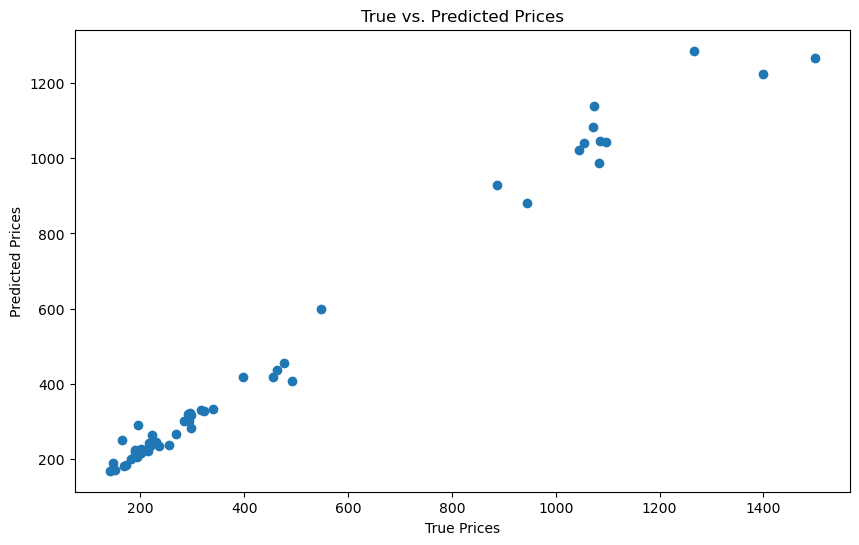

In [8]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", loss)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plot the predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs. Predicted Prices')
plt.show()

In [9]:
# Save the model
model.save('trained_model.h5')